<a id='index'></a>
##### Index
* <a href='#introduction'>1. Introduction</a>
* <a href='#preprocessing'>2. Preprocessing</a>
    * <a href='#pre:function'>2.1. Preprocessing function definition</a>
    * <a href='#pre:data'>2.2. Data loading</a>
    * <a href='#pre:imputation'>2.3. Imputation</a>
    * <a href='#pre:outlier'>2.4. Outlier removal</a>

<a href='#index'>...</a>
<a id='introduction'></a>
# Introduction

In [1]:
import pandas as pd
import sklearn
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm
from scipy import stats
import warnings
from ipywidgets import IntProgress

<a href='#index'>...</a>
<a id='preprocessing'></a>
# Preprocessing

<a id='pre:function'></a>
## Preprocessing function definition

In [2]:
def set_display_range(range_columns=pd.options.display.max_columns, range_rows=pd.options.display.max_rows, reset_columns=0, reset_rows=0):
    pd.set_option('display.max_columns', range_columns)
    pd.set_option('display.max_rows', range_rows)
    if (reset_columns): pd.reset_option('display.max_columns')
    if (reset_rows): pd.reset_option('display.max_rows')

set_display_range(range_columns=None)

In [3]:
def column_percentage(df, column, main_label):
    try:
        return len(df.loc[df[column]==main_label])/len(df)
    except:
        return -1

In [64]:
def plot_zero_relevance(df, columns, dim_x, dim_y, main_title='SAMPLE TITLE', titles=None, verbose=0):
    col = 0
    total = df.shape[0]
    if (verbose) : print("Number of 0's:")
    if (titles == None) : titles=columns 
    fig, axes = plt.subplots(dim_x, dim_y, figsize=(16,8))
    fig.suptitle(main_title)
    try:
        for i in range(dim_x):
            for j in range(dim_y):
                if (verbose):
                    print("* "+titles[col]+" \t{} ({:.2f}%)".format(sum(df[columns[col]]==0),sum(df[columns[col]]==0)/total*100))
                with warnings.catch_warnings():
                    warnings.simplefilter('ignore')
                    ax = sns.distplot(ax=axes[i,j], x=df[columns[col]], color='#388E3C') # hist=True
                if (ax.lines != []):
                    kde_x, kde_y = ax.lines[0].get_data()
                    ax.fill_between(kde_x, kde_y, where=(kde_x<20), interpolate=True, color='#EF9A9A')
                axes[i,j].set_title(titles[col])  
                col+=1
    except:
        pass

<a id='pre:data'></a>
## Data loading 

In [5]:
root_folder = '../CDSL_HM_20200720_RAW'

In [78]:
# CDSL_01
df_patient = pd.read_csv(root_folder+'/CDSL_01.csv', sep=';')
# CDSL_02
df_med = pd.read_csv(root_folder+'/CDSL_02.csv', sep=';')#, encoding='iso-8859-1')
# CDSL_03
df_cons = pd.read_csv(root_folder+'/CDSL_03.csv', sep=';')
# CDSL_05 (emergency)
df_ICD10_emer = pd.read_csv(root_folder+'/CDSL_05.csv', sep=';')
# CDSL_06  (admission)
df_ICD10_adm = pd.read_csv(root_folder+'/CDSL_06.csv', sep=';')

In [35]:
# CDSL_04
df_lab = pd.read_csv(root_folder+'/CDSL_04.csv', sep=';', error_bad_lines=False, encoding='iso-8859-1')

b'Skipping line 28039: expected 8 fields, saw 12\nSkipping line 32182: expected 8 fields, saw 12\nSkipping line 44299: expected 8 fields, saw 12\n'
b'Skipping line 90790: expected 8 fields, saw 12\nSkipping line 105234: expected 8 fields, saw 12\nSkipping line 130735: expected 8 fields, saw 10\n'
b'Skipping line 136659: expected 8 fields, saw 10\nSkipping line 140398: expected 8 fields, saw 10\nSkipping line 141687: expected 8 fields, saw 12\nSkipping line 142745: expected 8 fields, saw 12\nSkipping line 170183: expected 8 fields, saw 12\n'
b'Skipping line 223336: expected 8 fields, saw 21\nSkipping line 237392: expected 8 fields, saw 12\n'
b'Skipping line 373889: expected 8 fields, saw 12\nSkipping line 382978: expected 8 fields, saw 10\n'
b'Skipping line 412136: expected 8 fields, saw 12\nSkipping line 419764: expected 8 fields, saw 12\nSkipping line 421226: expected 8 fields, saw 12\nSkipping line 426429: expected 8 fields, saw 11\nSkipping line 444865: expected 8 fields, saw 12\n'


##### df_patient

In [80]:
df_patient = df_patient.rename(columns=
                        {"PATIENT ID":"PATIENT_ID", "EDAD/AGE":"AGE", "SEXO/SEX":"SEX", "DIAG ING/INPAT":"DIAG_INPAT", 
                        "F_INGRESO/ADMISSION_D_ING/INPAT":"ADMISSION_DATE_INPAT","HORA/TIME_ADMISION/ADMISSION_URG/EMERG":
                         "TIME_ADMISSION_EMERG","F_ENTRADA_UC/ICU_DATE_IN":"ICU_DATE_IN", 
                        "F_SALIDA_UCI/ICU_DATE_OUT":"ICU_DATE_OUT","UCI_DIAS/ICU_DAYS": "ICU_DAYS", 
                        "RESPIRADOR/MECH.VENT.":"MECH.VENT.", "F_ALTA/DISCHARGE_DATE_ING":"DISCHARGE_DATE_ING", 
                        "MOTIVO_ALTA/DESTINY_DISCHARGE_ING":"DESTINY_DISCHARGE_ING","F_INGRESO/ADMISSION_DATE_URG/EMERG":
                        "ADMISSION_DATE_EMERG", "HORA/TIME_ADMISION/ADMISSION_EMERG/EMERG":"TIME_ADMISION_EMERG", 
                        "ESPECIALIDAD/DEPARTMENT_URG/EMERG":"DEPARTMENT_EMERG","DIAG_URG/EMERG":"DIAG_EMERG", 
                        "DESTINO/DESTINY_URG/EMERG":"DESTINY_EMERG", "HORA/TIME_CONSTANT_PRIMERA/FIRST_URG/EMERG" : 
                        "TIME_CONSTANT_FIRST_EMERG", "TEMP_PRIMERA/FIRST_URG/EMERG":"TEMP_FIRST_EMERG", "FC/HR_PRIMERA/FIRST_URG/EMERG": 
                        "HR_FIRST_EMERG", "GLU_PRIMERA/FIRST_URG/EMERG":"GLU_FIRST_EMERG", "SAT_02_PRIMERA/FIRST_URG/EMERG":
                        "SAT_02_FIRST_EMERG", "TA_MAX_PRIMERA/FIRST/EMERG_URG":"TA_MAX_FIRST_EMERG", "TA_MIN_PRIMERA/FIRST_URG/EMERG":
                        "TA_MIN_FIRST_EMERG", "HORA/TIME_CONSTANT_ULTIMA/LAST_URG/EMERG":"TIME_CONSTANT_LAST_EMERG", 
                        "FC/HR_ULTIMA/LAST_URG/EMERG":"HR_LAST_EMERG", "TEMP_ULTIMA/LAST_URG/EMERG":"TEMP_LAST_EMERG", 
                        "GLU_ULTIMA/LAST_URG/EMERG":"GLU_LAST_EMERG", "SAT_02_ULTIMA/LAST_URG/EMERG":"SAT_02_LAST_EMERG", 
                        "TA_MAX_ULTIMA/LAST_URGEMERG":"TA_MAX_LAST_EMERG", "TA_MIN_ULTIMA/LAST_URG/EMERG":"TA_MIN_LAST_EMERG"})

custom_columns = ['PATIENT_ID', 'AGE', 'SEX', 
                  'DIAG_INPAT', 'ADMISSION_DATE_INPAT',
                  'ADMISSION_DATE_EMERG','DISCHARGE_DATE_ING','TIME_ADMISSION_EMERG', 
                  'DEPARTMENT_EMERG', 'DIAG_EMERG','DESTINY_EMERG',
                  'ICU_DATE_IN', 'ICU_DATE_OUT','ICU_DAYS', 
                  'MECH.VENT.', 'TIME_CONSTANT_FIRST_EMERG', 'TIME_CONSTANT_LAST_EMERG', 
                  'HR_FIRST_EMERG','HR_LAST_EMERG',
                  'SAT_02_FIRST_EMERG', 'SAT_02_LAST_EMERG',
                  'TA_MAX_FIRST_EMERG','TA_MAX_LAST_EMERG',
                  'TA_MIN_FIRST_EMERG','TA_MIN_LAST_EMERG', 
                  'TEMP_FIRST_EMERG','TEMP_LAST_EMERG',
                  'GLU_FIRST_EMERG','GLU_LAST_EMERG',
                  'DESTINY_DISCHARGE_ING']

df_patient = df_patient.reindex(columns=custom_columns)

Statistical data.

In [88]:
print("MALE/FEMALE: {:.2f}%".format(100*column_percentage(df_patient,'SEX','MALE')))
print("CONFIRMED COVID/SUSPECTED COVID: {:.2f}%".format(100*column_percentage(df_patient,'DIAG_INPAT','COVID CONFIRMADO')))
print("DECEASED/OTHERWISE: {:.2f}%".format(100*column_percentage(df_patient,'DESTINY_DISCHARGE_ING','Fallecimiento')))
print("Inpatients without being in ER: {}. Inpatients being in ER: {}.".format(\
      df_patient.shape[0] - len(df_patient[~df_patient['ADMISSION_DATE_EMERG'].isnull()]), \
      len(df_patient[~df_patient['ADMISSION_DATE_EMERG'].isnull()])))

MALE/FEMALE: 58.78%
CONFIRMED COVID/SUSPECTED COVID: 90.97%
DECEASED/OTHERWISE: 14.96%
Inpatients without being in ER: 90. Inpatients being in ER: 2457.


In [89]:
# Create ICU feature
df_patient['ICU']=0
df_patient.loc[~df_patient['ICU_DAYS'].isnull(),['ICU']]=1
df_patient['ICU']=df_patient['ICU'].astype("category")

# Create ER feature
df_patient['ER']=0
df_patient.loc[~df_patient['ADMISSION_DATE_EMERG'].isnull(),['ER']]=1
df_patient['ER']=df_patient['ER'].astype("category")


In [90]:
# REMOVE COLUMNS OF DATES (WHY USE THEM?): 'ICU_DATE_IN','ICU_DATE_OUT','ICU_DAYS','TIME_ADMISSION_EMERG',
                                          # 'DISCHARGE_DATE_ING', 'TIME_CONSTANT_FIRST_EMERG'
# REMOVE ADMISSION DATES TOO...           # 'ADMISSION_DATE_INPAT', 'ADMISSION_DATE_EMERG'  

# REMOVE LAST CHECK COLUMNS (?): 'TIME_CONSTANT_LAST_EMERG', 'HR_LAST_EMERG', 'SAT_02_LAST_EMERG', 
                                # TA_MIN_LAST_EMERG', 'TA_MAX_LAST_EMERG',
                                # 'TEMP_LAST_EMERG', 'GLU_LAST_EMERG'
        
# REMOVE 'DESTINY_EMERG', all samples are "ingresado"

df_patient = df_patient.drop(columns=['ICU_DATE_IN','ICU_DATE_OUT','ICU_DAYS','TIME_ADMISSION_EMERG',
                                      'DISCHARGE_DATE_ING','TIME_CONSTANT_LAST_EMERG', 'HR_LAST_EMERG',
                                      'SAT_02_LAST_EMERG', 'TA_MIN_LAST_EMERG', 'TA_MAX_LAST_EMERG',
                                      'TEMP_LAST_EMERG', 'GLU_LAST_EMERG','DESTINY_EMERG','TIME_CONSTANT_FIRST_EMERG',
                                      'ADMISSION_DATE_INPAT','ADMISSION_DATE_EMERG'])


##### df_med

##### df_cons

In [92]:
#df_cons.info()

# Rename columns
df_cons.rename(columns={'IDINGRESO':'ID_PATIENT'})
# Format 'TEMP_ING'
df_cons['TEMP_ING']=pd.to_numeric(df_cons['TEMP_ING'], errors='coerce')

##### df_lab

<a href=https://www.sciencedirect.com/science/article/abs/pii/S0009898120304125>Source</a>

Laboratory features cut-off values (severe):

* Lymphocyte  (LIN  -- linfocitos)  <0.8*10e3/µL
* Lymphocyte% (LIN% -- linfocitos)  <15% of total white blood cells

* Neutrophils  (NEU  -- Neutrofilos) >3.5e3/µL
* Neutrophils% (NEU% -- Neutrofilos) 

* Plaletes (PLAQ -- Recuento de plaquetas) <150e3/µL

* D-dimer (DD -- DIMERO D) >400ng/mL

* LDH (LDH -- LDH) >280U/L



In [97]:
df_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584370 entries, 0 to 584369
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   IDINGRESO   584370 non-null  int64 
 1   LAB_NUMBER  584370 non-null  object
 2   LAB_DATE    584370 non-null  object
 3   TIME_LAB    584370 non-null  object
 4   ITEM_LAB    584370 non-null  object
 5   VAL_RESULT  580100 non-null  object
 6   UD_RESULT   545188 non-null  object
 7   REF_VALUES  565633 non-null  object
dtypes: int64(1), object(7)
memory usage: 35.7+ MB


<a id='pre:imputation'></a>
## Imputation

##### df_patient

Categorical imputation.

In [93]:
# DIAG_EMERG
df_patient['DIAG_EMERG']=df_patient['DIAG_EMERG'].fillna(value='Unknown')
df_patient['DIAG_EMERG']=df_patient['DIAG_EMERG'].astype("category")
# MECHANICAL VENTILATION
df_patient['MECH.VENT.']=df_patient['MECH.VENT.'].fillna(value='NO')
df_patient['MECH.VENT.']=df_patient['MECH.VENT.'].astype("category")
# MECHANICAL VENTILATION
df_patient['DEPARTMENT_EMERG']=df_patient['DEPARTMENT_EMERG'].fillna(value='Unknown')
df_patient['DEPARTMENT_EMERG']=df_patient['DEPARTMENT_EMERG'].astype("category")
# DESTINY_DISCHARGE_ING
df_patient['DESTINY_DISCHARGE_ING']=df_patient['DESTINY_DISCHARGE_ING'].fillna(value='Unknown')
df_patient['DESTINY_DISCHARGE_ING']=df_patient['DESTINY_DISCHARGE_ING'].astype("category")
# SEX
df_patient['SEX']=df_patient['SEX'].astype("category")
# DIAG_INPAT
df_patient['DIAG_INPAT']=df_patient['DIAG_INPAT'].astype("category")


Number of 0's:
* HR_FIRST_EMERG 	607 (23.83%)
* SAT_02_FIRST_EMERG 	574 (22.54%)
* TA_MAX_FIRST_EMERG 	927 (36.40%)
* TA_MIN_FIRST_EMERG 	928 (36.44%)
* TEMP_FIRST_EMERG 	629 (24.70%)
* GLU_FIRST_EMERG 	2519 (98.90%)


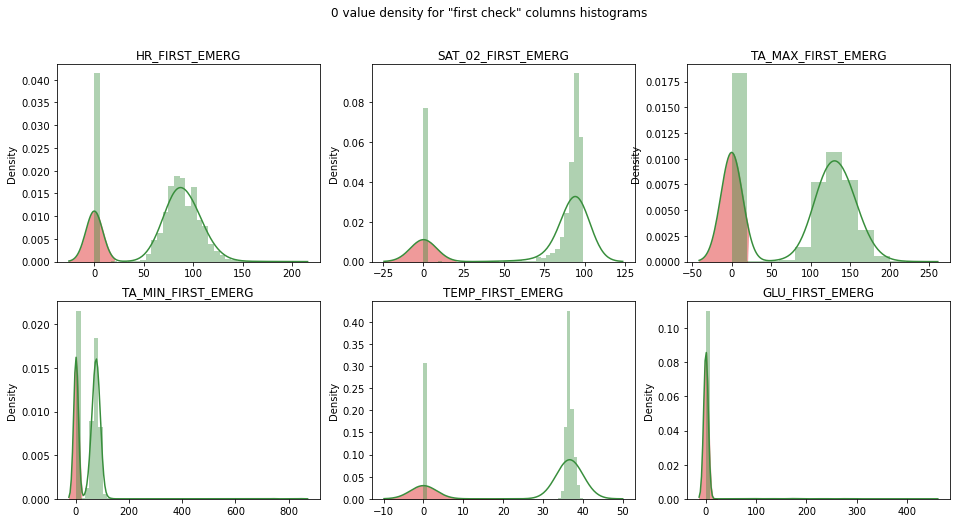

In [94]:
columns_first_check = ['HR_FIRST_EMERG', 'SAT_02_FIRST_EMERG', 'TA_MAX_FIRST_EMERG', 'TA_MIN_FIRST_EMERG',
                       'TEMP_FIRST_EMERG', 'GLU_FIRST_EMERG']
plot_zero_relevance(df_patient, columns_first_check, 2, 3, '0 value density for "first check" columns histograms', verbose=1)

Numerical imputation.

Number of 0's:
* HR_FIRST_EMERG 	0 (0.00%)
* SAT_02_FIRST_EMERG 	0 (0.00%)
* TA_MAX_FIRST_EMERG 	0 (0.00%)
* TA_MIN_FIRST_EMERG 	0 (0.00%)
* TEMP_FIRST_EMERG 	0 (0.00%)


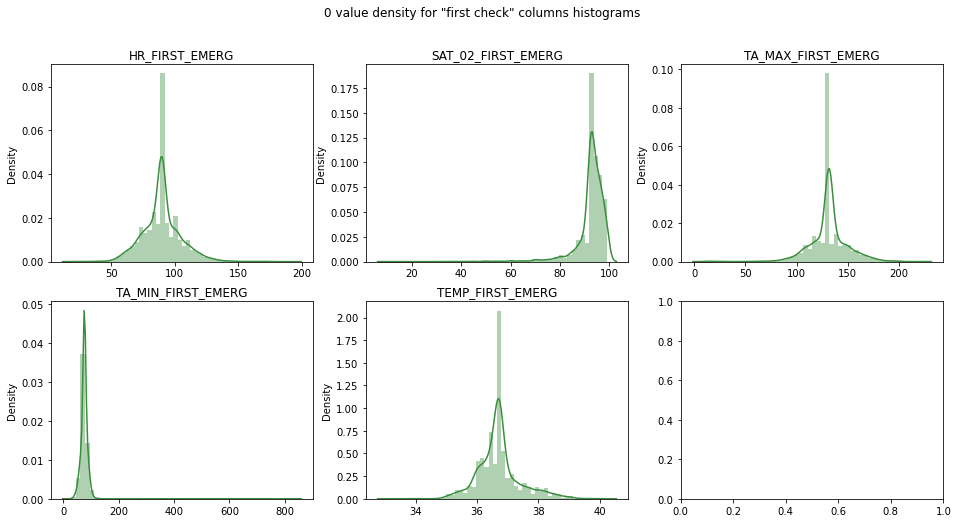

In [95]:
###### TEMPORAL
df_patient= df_patient.drop(columns=['GLU_FIRST_EMERG'])

imp = SimpleImputer(missing_values=0, strategy='mean')
df_patient[columns_first_check[:-1]] = pd.DataFrame(imp.fit_transform(df_patient[columns_first_check[:-1]]))


plot_zero_relevance(df_patient, columns_first_check[:-1], 2, 3, '0 value density for "first check" columns histograms', verbose=1)

In [15]:
df_patient.describe()

,PATIENT_ID,AGE,HR_FIRST_EMERG,SAT_02_FIRST_EMERG,TA_MAX_FIRST_EMERG,TA_MIN_FIRST_EMERG,TEMP_FIRST_EMERG
count,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000
mean,1287.838241,67.912839,89.760309,92.533705,131.456173,75.816553,36.713399
std,742.530258,16.719095,14.894306,6.111976,18.420525,22.767365,0.699968
min,1.000000,0.000000,21.000000,10.000000,10.000000,11.000000,33.200000
25%,648.500000,57.000000,82.000000,92.000000,125.000000,72.000000,36.300000
50%,1290.000000,70.000000,89.760309,93.000000,131.456173,75.816553,36.713399
75%,1931.500000,80.000000,97.000000,96.000000,138.000000,79.000000,36.900000
max,2571.000000,106.000000,190.000000,99.000000,220.000000,845.000000,40.100000


##### df_med

##### df_cons

Number of 0's:
* TA_MAX_ING 	100181 (78.26%)
* TA_MIN_ING 	100189 (78.27%)
* TEMP_ING 	63102 (49.30%)
* FC_HR_ING 	81202 (63.44%)
* SAT_02_ING 	66364 (51.84%)
* GLU_GLY_ING 	128005 (100.00%)


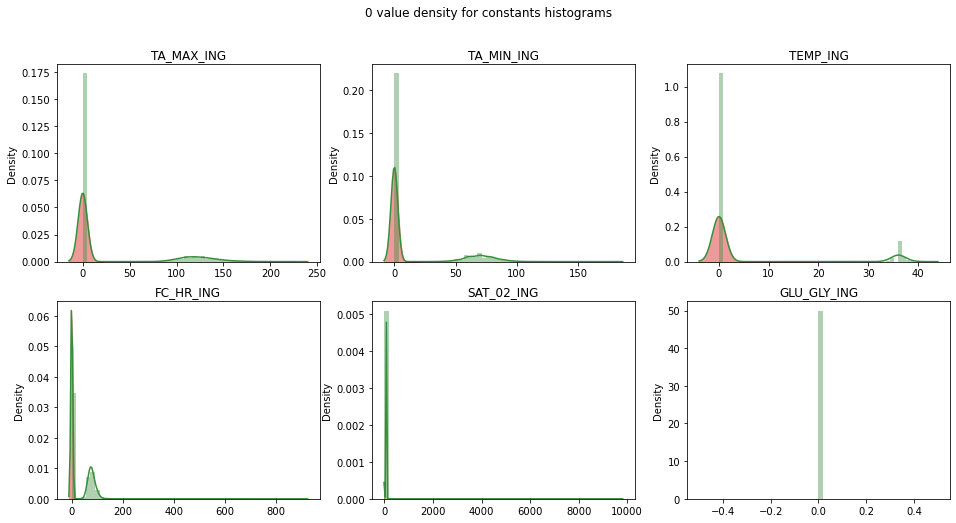

In [66]:
columns_cons = ['TA_MAX_ING', 'TA_MIN_ING', 'TEMP_ING', 'FC_HR_ING', 'SAT_02_ING', 'GLU_GLY_ING']
plot_zero_relevance(df_cons, columns_cons, 2, 3, '0 value density for constants histograms', verbose=1)

In [73]:
# df_cons = df_cons.drop(columns=['GLU_GLY_ING'])
df_cons['TEMP_ING']=df_cons['TEMP_ING'].fillna(value=0)
imp = SimpleImputer(missing_values=0, strategy='mean')
df_cons[columns_cons[:-1]] = pd.DataFrame(imp.fit_transform(df_cons[columns_cons[:-1]]))


Number of 0's:
* TA_MAX_ING 	0 (0.00%)
* TA_MIN_ING 	0 (0.00%)
* TEMP_ING 	0 (0.00%)
* FC_HR_ING 	0 (0.00%)
* SAT_02_ING 	0 (0.00%)


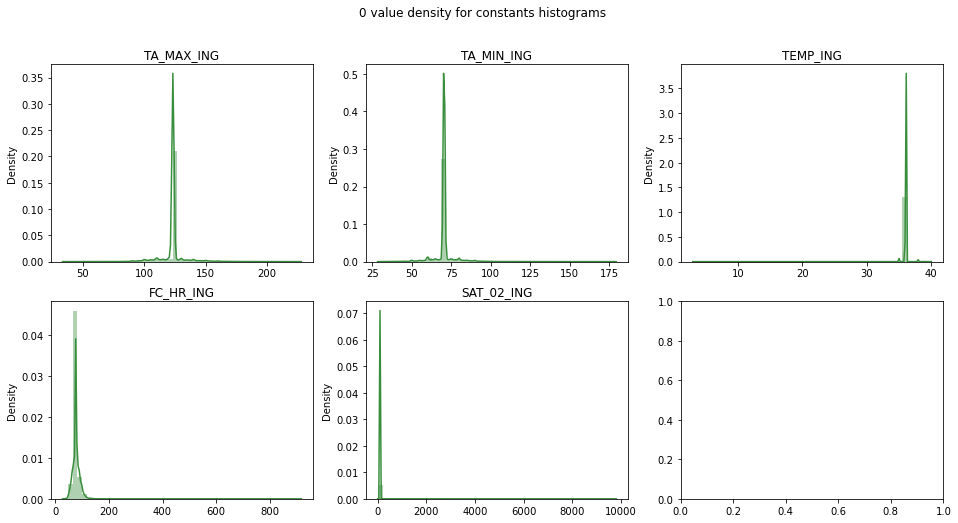

In [74]:
plot_zero_relevance(df_cons, columns_cons[:-1], 2, 3, '0 value density for constants histograms', verbose=1)

<a id='pre:outlier'></a>
## Outlier removal (adaptation)

* <b>HR_FIRST_EMERG</b>
Normal values: 60-90 beats per minute
* <b>SAT_02_FIRST_EMERG</b>
Normal values: 75-100 mmHg
* <b>TA_MAX_FIRST_EMERG</b>
Normal values: 80-120 mmHg
* <b>TA_MIN_FIRST_EMERG</b>
Normal values: 80-120 mmHg
* <b>TEMP_FIRST_EMERG</b>
Normal values: 36-38 ºC
* <b>GLU_FIRST_EMERG</b>
Normal values:70-100 mg/dl (3.9-5.6 mmol/l) ºº

##### df_patient

In [86]:
## TEMPORAL

z_scores = stats.zscore(df_patient[columns_first_check[:-1]])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_patient = df_patient[filtered_entries]

##### df_med

##### df_cons